### Background

Pernalonga, a leading supermarket chain of over 400 stores in Lunitunia, sells over 10 thousand products in over 400 categories.  Pernalonga regularly partners with suppliers to fund promotions and derives about 30% of its sales on promotions.  While a majority of its promotion activities are in-store promotions, it recently started partnering with select suppliers to experiment on personalized promotions.  In theory, personalized promotions are more efficient as offers are only made to targeted individuals who required an offer to purchase a product.  In contrast, most in-store promotions make temporary price reductions on a product available to all customers whether or not a customer needs the incentive to purchase the product.  The efficiency of personalized promotion comes from an additional analysis required on customer transaction data to determine which customers are most likely to purchase a product to be offered in order to maximize the opportunity for incremental sales and profits.

### Problem

Your analytics consulting firm is being considered by Pernalonga (the client) to develop a marketing campaign to experiment on personalized promotions.  While the details of specific partnerships with suppliers to fund the experimental personalized promotions are still being negotiated, you have started to receive data from the client.  You have two weeks to analyze and understand the data and report back initial insights to the client.  In order to be selected as the sole-developer of the marketing campaign, your team needs to demonstrate that you know the data very well, i.e., you need to show the client that you know the profiles of their stores, products and customers better than they do and are ready to take on the task of developing the marketing campaign. 

From the client’s point of view, they need to be confident that you know the answers to the following key questions:

   * Who are the best customers in terms of revenues, profits, transactions/store visits, number of products, etc.?
   * What are the products and product groups with the best volumes, revenues, profits, transactions, customers, etc.?
   * Which stores rank the highest in volumes, revenues, profits, transactions, customers, etc.?
   * Are there interesting groupings of customers, e.g., most valuable (buy everything at any price) or cherry-pickers (buy mostly on promotions), defined by certain categories (buy baby products or never buy milk), etc.?
   * Other than product categories and sub-categories, are there other product groupings, e.g., Key Value Items (KVI) and Key Value Categories (KVC), traffic drivers, always promoted versus seldom/never promoted, etc.?
   * Are there natural groupings of stores, e.g., stores frequented by cherry-pickers versus stores visited by most loyal customers?


### Available Data

##### transaction_table.csv - contains transaction history in 2016 and 2017 for close to 8,000 customers


   * cust_id – Customer ID
   * tran_id – Transaction ID
   * tran_dt – Transaction Date
   * store_id – Store ID
   * prod_id – Product ID
   * prod_unit – Product unit of measure: CT for count and KG for kilograms
   * prod_unit_price – Unit price of the product
   * tran_prod_sale_qty – Quantity/units of the product in the transaction
   * tran_prod_sale_amt – Sales amount for the product before discounts in the transaction
   * tran_prod_discount_amt – Total amount of discounts applied to the product in the transaction
   * tran_prod_offer_cts – Total number of offers on the product resulting in the total amount of discounts in the transaction
   * tran_prod_paid_amt – Amount paid for the product after discounts are applied in the transaction

##### product_table.csv - contains the product to subcategory and category mapping and descriptions for about 11,000 products 


   * prod_id – Product ID
   * subcategory_id – Subcategory ID
   * category_id – Category ID
   * sub_category_desc – Subcategory name (in Portuguese)
   * category_desc – Category name (in Portuguese)
   * category_desc_eng – Category name (in English)
   * brand_desc – Brand of the product, including NO LABEL and PRIVATE LABEL


# CUSTOMER - EXPLORATORY DATA ANALYSIS

In [1]:
# Import libraries

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import pandas_profiling
import os, sys

import datetime

In [2]:
# set # of columns and rows to display

pd.set_option('max_columns', None)
pd.set_option('max_rows', 50)

In [3]:
# Import transaction table

transactions = pd.read_csv('transaction_table.csv')

transactions.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.00,0,2.89,0.7225
1,799924,2.017111e+18,2017-11-12,349,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225
2,1399898,2.017102e+18,2017-10-21,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225
3,1399898,2.017111e+18,2017-11-11,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225
4,1399898,2.017121e+18,2017-12-05,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225


In [4]:
# Transactions shape

transactions.shape

(29617585, 12)

In [5]:
# Transactions data types

transactions.dtypes

cust_id                     int64
tran_id                   float64
tran_dt                    object
store_id                    int64
prod_id                     int64
prod_unit                  object
tran_prod_sale_amt        float64
tran_prod_sale_qty        float64
tran_prod_discount_amt    float64
tran_prod_offer_cts         int64
tran_prod_paid_amt        float64
prod_unit_price           float64
dtype: object

In [6]:
# Transactions descriptive statistics

transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
cust_id,29617585.0,5.016900e+07,2.904564e+07,2.956800e+04,2.500986e+07,5.025960e+07,7.568990e+07,9.999978e+07
tran_id,29617585.0,2.016584e+18,4.993258e+14,2.016010e+18,2.016072e+18,2.017011e+18,2.017070e+18,2.017123e+18
store_id,29617585.0,4.457788e+02,2.004097e+02,1.020000e+02,2.940000e+02,3.930000e+02,5.880000e+02,9.990000e+02
prod_id,29617585.0,9.797496e+08,1.192139e+08,1.455190e+08,9.992470e+08,9.993624e+08,9.996799e+08,9.999997e+08
tran_prod_sale_amt,29617585.0,2.503286e+00,4.130594e+00,1.000000e-02,9.000000e-01,1.590000e+00,2.790000e+00,3.371250e+03
tran_prod_sale_qty,29617585.0,1.667866e+00,2.279535e+00,1.000000e-03,1.000000e+00,1.000000e+00,2.000000e+00,2.112000e+03
tran_prod_discount_amt,29617585.0,-4.027838e-01,1.558037e+00,-1.400250e+03,-2.400000e-01,0.000000e+00,0.000000e+00,0.000000e+00
tran_prod_offer_cts,29617585.0,3.408940e-01,5.339727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.600000e+01
tran_prod_paid_amt,29617585.0,2.100502e+00,3.162718e+00,-1.410000e+00,8.400000e-01,1.370000e+00,2.320000e+00,1.971000e+03
prod_unit_price,29617585.0,2.093038e+00,2.587080e+00,7.500000e-03,7.400000e-01,1.390000e+00,2.490000e+00,3.990000e+02


In [7]:
# Is there any amount paid for the product (after discounts) less than 0 ?

(transactions['tran_prod_paid_amt'] < 0).any()

True

In [8]:
# Filter out transactions less than 0

transactions.drop(transactions[transactions['tran_prod_paid_amt'] < 0].index, inplace = True)

In [9]:
# Transactions shape

transactions.shape

(29617577, 12)

In [10]:
# Checking potential errors in number of discounts

transactions["tran_prod_offer_cts"].value_counts()

0     20364070
1      8451995
2       766077
3        30327
4         4706
5          189
6          156
8           18
7           14
10           8
9            7
12           2
13           2
14           1
16           1
18           1
20           1
30           1
76           1
Name: tran_prod_offer_cts, dtype: int64

In [11]:
# More than 4 offers on the product

(transactions['tran_prod_offer_cts'] > 4).any()

True

In [12]:
# Individually screening whether the high numbers of discounts are error

transactions[transactions['tran_prod_offer_cts'] == 1].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8451995.0,8.451995e+06,8.451995e+06
mean,5.023613e+07,2.016533e+18,4.455133e+02,9.620627e+08,3.279136e+00,1.737134e+00,-1.198136e+00,1.0,2.081000e+00,2.445389e+00
std,2.905973e+07,5.028834e+14,1.994563e+02,1.626511e+08,4.861358e+00,2.271857e+00,2.151179e+00,0.0,3.017969e+00,3.015256e+00
min,2.956800e+04,2.016010e+18,1.370000e+02,1.455190e+08,1.000000e-02,2.000000e-03,-5.850000e+02,1.0,0.000000e+00,4.944444e-02
25%,2.506982e+07,2.016063e+18,3.030000e+02,9.992378e+08,1.290000e+00,1.000000e+00,-1.300000e+00,1.0,8.900000e-01,9.898214e-01
50%,5.038983e+07,2.016121e+18,3.880000e+02,9.993471e+08,2.000000e+00,1.000000e+00,-6.700000e-01,1.0,1.380000e+00,1.690000e+00
75%,7.570960e+07,2.017080e+18,5.880000e+02,9.996497e+08,3.580000e+00,2.000000e+00,-2.900000e-01,1.0,2.240000e+00,2.790000e+00
max,9.999978e+07,2.017123e+18,9.990000e+02,9.999997e+08,1.166100e+03,7.200000e+02,0.000000e+00,1.0,8.640000e+02,3.990000e+02


In [13]:
transactions[transactions['tran_prod_offer_cts'] == 2].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,7.660770e+05,7.660770e+05,766077.000000,7.660770e+05,766077.000000,766077.000000,766077.000000,766077.0,766077.000000,766077.000000
mean,5.008108e+07,2.016622e+18,428.054890,9.530078e+08,4.910995,2.085320,-2.157011,2.0,2.753984,3.189478
std,2.906043e+07,4.977442e+14,182.010254,1.810934e+08,9.139091,4.651372,4.228822,0.0,5.329454,4.602114
min,2.956800e+04,2.016010e+18,137.000000,1.455190e+08,0.020000,0.006000,-559.680000,2.0,0.000000,0.049444
25%,2.452972e+07,2.016100e+18,304.000000,9.992303e+08,1.590000,1.000000,-2.200000,2.0,0.960000,0.990000
50%,5.012994e+07,2.017022e+18,362.000000,9.993094e+08,2.690000,1.000000,-1.100000,2.0,1.560000,1.980000
75%,7.563963e+07,2.017083e+18,575.000000,9.995454e+08,4.990000,2.000000,-0.530000,2.0,2.840000,3.490000
max,9.999978e+07,2.017123e+18,999.000000,9.999992e+08,1314.720000,2112.000000,0.000000,2.0,755.040000,399.000000


In [14]:
transactions[transactions['tran_prod_offer_cts'] == 3].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,3.032700e+04,3.032700e+04,30327.000000,3.032700e+04,30327.000000,30327.000000,30327.000000,30327.0,30327.000000,30327.000000
mean,4.992584e+07,2.016828e+18,415.941933,9.676086e+08,7.889127,2.533450,-3.581054,3.0,4.308073,4.374162
std,2.904563e+07,4.463604e+14,166.616718,1.534534e+08,17.986815,5.685341,7.296938,0.0,11.407751,5.152979
min,2.956800e+04,2.016010e+18,137.000000,1.525760e+08,0.110000,0.060000,-324.800000,3.0,0.000000,0.079000
25%,2.364976e+07,2.016122e+18,310.000000,9.992313e+08,1.990000,1.000000,-3.720000,3.0,1.100000,1.150000
50%,5.003995e+07,2.017082e+18,347.000000,9.993498e+08,3.780000,1.000000,-1.600000,3.0,1.950000,2.190000
75%,7.568495e+07,2.017122e+18,561.000000,9.996265e+08,7.990000,3.000000,-0.740000,3.0,4.090000,5.488982
max,9.999978e+07,2.017123e+18,999.000000,9.999992e+08,674.550000,450.000000,-0.010000,3.0,459.650000,89.900000


In [15]:
transactions[transactions['tran_prod_offer_cts'] == 4].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,4.706000e+03,4.706000e+03,4706.000000,4.706000e+03,4706.000000,4706.000000,4706.000000,4706.0,4706.000000,4706.000000
mean,5.052354e+07,2.016491e+18,425.311305,9.695883e+08,14.002890,4.525606,-6.065852,4.0,7.937038,3.856950
std,2.903737e+07,4.832187e+14,181.413809,1.447050e+08,33.036649,7.659172,13.342729,0.0,20.840821,4.992215
min,3.977400e+04,2.016010e+18,137.000000,1.525760e+08,0.280000,0.166000,-302.940000,4.0,0.000000,0.079000
25%,2.427989e+07,2.016092e+18,303.000000,9.992349e+08,3.160000,2.000000,-5.640000,4.0,1.960000,0.890000
50%,5.076972e+07,2.016113e+18,353.000000,9.993284e+08,5.800000,2.000000,-2.460000,4.0,3.195000,1.990000
75%,7.631957e+07,2.017071e+18,572.000000,9.995469e+08,11.980000,4.000000,-1.020000,4.0,6.780000,3.990404
max,9.995981e+07,2.017123e+18,999.000000,9.999992e+08,484.380000,240.000000,-0.020000,4.0,305.660000,89.900000


In [16]:
transactions[transactions['tran_prod_offer_cts'] == 5].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.890000e+02,1.890000e+02,189.000000,1.890000e+02,189.000000,189.000000,189.000000,189.0,189.000000,189.000000
mean,5.064420e+07,2.016588e+18,423.677249,9.738502e+08,38.884656,11.585021,-14.416720,5.0,24.467937,4.007382
std,2.963801e+07,4.932579e+14,158.659969,1.327157e+08,93.161257,44.655027,32.661957,0.0,61.203388,4.468830
min,1.129755e+06,2.016011e+18,150.000000,1.806110e+08,1.160000,0.966000,-175.000000,5.0,0.740000,0.160000
25%,2.741962e+07,2.016093e+18,321.000000,9.992694e+08,3.600000,2.462000,-8.840000,5.0,2.750000,0.600000
50%,5.012994e+07,2.017011e+18,365.000000,9.995324e+08,7.960000,5.000000,-3.670000,5.0,4.270000,1.960000
75%,7.631991e+07,2.017080e+18,557.000000,9.997465e+08,19.670000,7.000000,-0.610000,5.0,11.360000,5.850000
max,9.960000e+07,2.017123e+18,986.000000,9.999869e+08,459.440000,600.000000,-0.250000,5.0,292.220000,19.990000


In [17]:
transactions[transactions['tran_prod_offer_cts'] == 6].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.560000e+02,1.560000e+02,156.000000,1.560000e+02,156.000000,156.000000,156.000000,156.0,156.000000,156.000000
mean,4.632069e+07,2.016500e+18,458.493590,9.596576e+08,31.380385,7.491410,-13.626474,6.0,17.753910,5.081309
std,2.756065e+07,4.862197e+14,188.609735,1.721638e+08,68.688221,9.090859,26.264291,0.0,43.715449,5.851404
min,2.997490e+05,2.016010e+18,143.000000,1.527610e+08,0.560000,0.710000,-210.000000,6.0,0.320000,0.160000
25%,2.529998e+07,2.016101e+18,332.750000,9.992287e+08,4.745000,2.027000,-13.200000,6.0,3.300000,0.990000
50%,4.203986e+07,2.016112e+18,475.000000,9.992702e+08,10.765000,4.000000,-5.040000,6.0,5.145000,2.590000
75%,6.440970e+07,2.017071e+18,588.000000,9.996354e+08,30.325000,8.000000,-1.690000,6.0,14.512500,7.065000
max,9.910978e+07,2.017122e+18,996.000000,9.999590e+08,599.400000,60.000000,-0.240000,6.0,389.400000,27.990000


In [18]:
transactions[transactions['tran_prod_offer_cts'] == 7].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.400000e+01,1.400000e+01,14.000000,1.400000e+01,14.000000,14.000000,14.00000,14.0,14.000000,14.000000
mean,4.901474e+07,2.016572e+18,425.357143,9.995536e+08,54.418571,11.571429,-19.30500,7.0,35.113571,2.352857
std,3.221396e+07,4.973117e+14,136.200422,2.380817e+05,165.782572,17.028096,55.40039,0.0,110.638242,2.985780
min,1.889991e+06,2.016071e+18,172.000000,9.991630e+08,4.200000,3.000000,-210.00000,7.0,2.170000,0.600000
25%,2.898968e+07,2.016092e+18,339.000000,9.993131e+08,4.867500,4.750000,-6.98000,7.0,3.850000,0.600000
50%,4.584957e+07,2.016567e+18,477.000000,9.997465e+08,5.400000,7.500000,-0.52500,7.0,4.950000,0.600000
75%,7.491737e+07,2.017061e+18,483.000000,9.997465e+08,12.720000,9.750000,-0.41250,7.0,6.327500,2.740000
max,9.099966e+07,2.017072e+18,632.000000,9.997465e+08,629.300000,70.000000,-0.35000,7.0,419.300000,8.990000


In [19]:
transactions[transactions['tran_prod_offer_cts'] == 8].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.0,18.000000,18.000000
mean,4.931308e+07,2.016619e+18,362.222222,9.994552e+08,175.810000,23.684778,-71.935556,8.0,103.874444,7.696692
std,2.651170e+07,5.045657e+14,153.739105,2.233359e+05,215.311102,19.923024,82.892298,0.0,134.312050,7.017227
min,1.989964e+07,2.016012e+18,153.000000,9.991638e+08,4.740000,2.000000,-300.000000,8.0,3.250000,0.600000
25%,2.585724e+07,2.016083e+18,269.000000,9.992392e+08,26.495000,8.500000,-109.917500,8.0,12.125000,1.912498
50%,4.426977e+07,2.017022e+18,330.000000,9.994643e+08,79.420000,22.545500,-45.955000,8.0,35.065000,7.489922
75%,7.145472e+07,2.017063e+18,442.250000,9.996429e+08,280.077500,29.214250,-11.442500,8.0,166.930000,10.990090
max,9.772982e+07,2.017121e+18,679.000000,9.997465e+08,749.250000,75.000000,-0.400000,8.0,449.250000,19.990000


In [20]:
transactions[transactions['tran_prod_offer_cts'] == 9].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,7.000000e+00,7.000000e+00,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.0,7.000000,7.000000
mean,6.586539e+07,2.016641e+18,465.000000,9.997189e+08,160.477143,27.866000,-61.544286,9.0,98.932857,3.994243
std,3.434289e+07,5.368426e+14,155.926265,2.499824e+05,308.100407,28.969882,108.063784,0.0,200.940107,5.219656
min,7.819901e+06,2.016050e+18,261.000000,9.992392e+08,6.000000,10.000000,-297.500000,9.0,5.500000,0.600000
25%,4.584957e+07,2.016077e+18,373.000000,9.996767e+08,7.200000,10.579000,-62.565000,9.0,6.600000,0.600000
50%,7.190964e+07,2.017061e+18,477.000000,9.997465e+08,17.350000,13.000000,-6.480000,9.0,10.870000,1.090921
75%,9.505472e+07,2.017062e+18,551.500000,9.998517e+08,118.220000,32.952000,-0.600000,9.0,55.655000,6.040000
max,9.951960e+07,2.017100e+18,668.000000,9.999898e+08,849.150000,85.000000,-0.500000,9.0,551.650000,12.988777


In [21]:
transactions[transactions['tran_prod_offer_cts'] == 10].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.0,8.000000,8.000000
mean,7.003850e+07,2.016576e+18,462.000000,9.997283e+08,327.101250,40.262375,-135.855000,10.0,191.246250,5.032520
std,2.612811e+07,5.365698e+14,170.241006,1.267567e+05,432.868846,38.201864,171.966635,0.0,264.396881,5.493981
min,1.989964e+07,2.016043e+18,261.000000,9.995521e+08,6.000000,10.000000,-450.000000,10.0,5.500000,0.600000
25%,6.539463e+07,2.016083e+18,267.000000,9.996500e+08,6.900000,11.500000,-242.895000,10.0,6.325000,0.600000
50%,7.285980e+07,2.016582e+18,533.500000,9.997465e+08,104.740000,21.549500,-55.940000,10.0,48.800000,2.245000
75%,8.544231e+07,2.017070e+18,607.250000,9.997465e+08,539.822500,62.750000,-0.575000,10.0,296.927500,9.490000
max,9.841998e+07,2.017093e+18,617.000000,9.999887e+08,1099.000000,100.000000,-0.500000,10.0,649.000000,13.990160


In [22]:
# Number of discounts larger than 6 don't seem to make sense

transactions.drop(transactions[transactions['tran_prod_offer_cts'] > 6].index, inplace = True)

In [23]:
# Segment together products with 5 offers with products with 6 offers for clustering later (few instances and similar characteristics)

transactions[transactions['tran_prod_offer_cts'] == 6] = 5

In [24]:
# Transactions shape

transactions.shape

(29617520, 12)

In [25]:
# Check count for offers on product

transactions["tran_prod_offer_cts"].value_counts()

0    20364070
1     8451995
2      766077
3       30327
4        4706
5         345
Name: tran_prod_offer_cts, dtype: int64

In [26]:
# Checking if there are errors in the sales amt

transactions['sale_amt'] = transactions['tran_prod_sale_amt'] + transactions['tran_prod_discount_amt'] - transactions['tran_prod_paid_amt']

sum(round(transactions['sale_amt'],2) != 0)

156

In [27]:
sum(transactions['tran_prod_discount_amt'] != 0)

9251609

In [28]:
# Checking specifics

transactions[round(transactions['sale_amt'],2) != 0].iloc[:,[6,8,10,12]]

,tran_prod_sale_amt,tran_prod_discount_amt,tran_prod_paid_amt,sale_amt
14696,5.0,5.0,5.0,5.0
194586,5.0,5.0,5.0,5.0
200738,5.0,5.0,5.0,5.0
204652,5.0,5.0,5.0,5.0
299034,5.0,5.0,5.0,5.0
...,...,...,...,...
26802764,5.0,5.0,5.0,5.0
27321755,5.0,5.0,5.0,5.0
27444231,5.0,5.0,5.0,5.0
28180741,5.0,5.0,5.0,5.0


In [29]:
# removing those rows

transactions.drop(transactions[round(transactions['sale_amt'],2) != 0].index, inplace = True)

In [30]:
sum(round(transactions['sale_amt'],2) != 0)

0

In [31]:
# Drop the tempory column

transactions.drop("sale_amt", axis=1, inplace = True)

In [32]:
# Converting transaction date from object to date 

transactions['tran_dt'] = pd.to_datetime(transactions['tran_dt'])

In [33]:
# Creating day of the week column

transactions['weekday'] = transactions['tran_dt'].dt.day_name()

In [34]:
# Creating month column 

transactions['month'] = transactions['tran_dt'].dt.month

In [35]:
# Creating year column

transactions['year'] = transactions['tran_dt'].dt.year

In [36]:
# Checking for NAs

transactions.isna().sum()

cust_id                   0
tran_id                   0
tran_dt                   0
store_id                  0
prod_id                   0
prod_unit                 0
tran_prod_sale_amt        0
tran_prod_sale_qty        0
tran_prod_discount_amt    0
tran_prod_offer_cts       0
tran_prod_paid_amt        0
prod_unit_price           0
weekday                   0
month                     0
year                      0
dtype: int64

In [37]:
# Import products table

products = pd.read_csv('product_table.csv')

products.head()

,prod_id,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
0,145519008,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
1,145519009,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
2,145519010,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
3,145519011,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
4,145519012,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH


In [38]:
# Products shape

products.shape

(10767, 7)

In [39]:
# Products data types

products.dtypes

prod_id               int64
subcategory_id        int64
sub_category_desc    object
category_id           int64
category_desc        object
brand_desc           object
category_desc_eng    object
dtype: object

In [40]:
# Checking for NAs

products.isna().sum()

prod_id              0
subcategory_id       0
sub_category_desc    0
category_id          0
category_desc        0
brand_desc           0
category_desc_eng    0
dtype: int64

In [41]:
# Merging transactions and customers table

transaction_product = transactions.merge(products, how="inner", on="prod_id")

transaction_product.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price,weekday,month,year,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.00,0,2.89,0.7225,Friday,11,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
1,799924,2.017111e+18,2017-11-12,349,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Sunday,11,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
2,1399898,2.017102e+18,2017-10-21,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Saturday,10,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
3,1399898,2.017111e+18,2017-11-11,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Saturday,11,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
4,1399898,2.017121e+18,2017-12-05,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Tuesday,12,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH


In [42]:
# Checking for NAs

transaction_product.isna().sum()

cust_id                   0
tran_id                   0
tran_dt                   0
store_id                  0
prod_id                   0
prod_unit                 0
tran_prod_sale_amt        0
tran_prod_sale_qty        0
tran_prod_discount_amt    0
tran_prod_offer_cts       0
tran_prod_paid_amt        0
prod_unit_price           0
weekday                   0
month                     0
year                      0
subcategory_id            0
sub_category_desc         0
category_id               0
category_desc             0
brand_desc                0
category_desc_eng         0
dtype: int64

#### Who are the best customers in terms of revenues, profits, transactions/store visits, number of products, etc.?

In [43]:
# Total number of unique customers

transaction_product['cust_id'].nunique()

7920

In [44]:
# Best customers in terms of revenues

transaction_product.groupby('cust_id').tran_prod_paid_amt.sum().sort_values(ascending=False)

cust_id
97729819    13905.48
13489682    13785.17
91709522    13701.00
59899635    13535.48
70759790    13530.19
              ...   
4229650      4161.82
70779661     4128.84
92099547     3881.40
71909645     3870.09
50789947     3867.10
Name: tran_prod_paid_amt, Length: 7920, dtype: float64

In [45]:
# Customers with the highest number of transactions (ALL TRANSACTIONS - NOT UNIQUE)

transaction_product.groupby('cust_id').tran_id.count().sort_values(ascending=False)

cust_id
11879968    10790
29629991     9652
40549840     9462
92969652     8787
89919975     8581
            ...  
66869557      559
99109783      537
85429551      536
96879682      228
71909645      168
Name: tran_id, Length: 7920, dtype: int64

In [46]:
# Customers with the highest number of unique transactions

transaction_product.drop_duplicates(['tran_id', 'cust_id']).groupby('cust_id')['tran_id'].count().sort_values(ascending=False)

cust_id
42559965    724
4579768     722
6149849     720
6559701     717
72999968    716
           ... 
92909764     81
40889581     80
66869557     65
96879682     60
71909645     35
Name: tran_id, Length: 7920, dtype: int64

In [47]:
# Customer that were given products for free

transaction_product[transaction_product['tran_prod_paid_amt'] == 0].groupby('cust_id')['tran_prod_paid_amt'].count().sort_values(ascending=False)

cust_id
16509833    56
15669814    46
17329814    43
47409814    36
87359769    36
            ..
47649831     1
48199798     1
48439936     1
48549610     1
99899717     1
Name: tran_prod_paid_amt, Length: 1156, dtype: int64

In [48]:
# Customers that bought the most number of unique products

transaction_product.groupby('cust_id')['prod_id'].nunique().sort_values(ascending=False)

cust_id
91219977    1972
43769997    1939
78839724    1939
27999642    1910
3689897     1883
            ... 
85429551     157
83549543     151
76619544     144
99109783     131
71909645     112
Name: prod_id, Length: 7920, dtype: int64

In [49]:
# Customers who saved the most by  buying products on discount

transaction_product.groupby('cust_id')['tran_prod_discount_amt'].sum().sort_values(ascending=True)

cust_id
77329638   -6781.30
22179626   -6037.68
79819893   -5548.56
9519528    -4986.84
54939899   -4943.99
             ...   
45519694    -304.29
6759926     -302.90
74569670    -301.15
49309956    -299.94
15509934    -298.50
Name: tran_prod_discount_amt, Length: 7920, dtype: float64

In [50]:
# Number of stores that customer made a purchase

transaction_product.groupby('cust_id')['store_id'].nunique().sort_values(ascending=False)

cust_id
93199828    76
15469869    57
98709960    54
75719956    51
53449947    50
            ..
26439761     1
86199539     1
86239805     1
26159683     1
99999776     1
Name: store_id, Length: 7920, dtype: int64

In [51]:
# Customers that spent the most in 2016

transaction_product[transaction_product['year'] == 2016].groupby('cust_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

cust_id
77749835    11743.91
6839963     11694.85
5199595     10769.44
46639950    10489.94
40579818     9833.62
              ...   
72349555       17.41
78099516        8.82
15979510        7.68
58859523        6.37
85079513        3.64
Name: tran_prod_paid_amt, Length: 7920, dtype: float64

In [52]:
# Customers hat spent the most in 2017

transaction_product[transaction_product['year'] == 2017].groupby('cust_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

cust_id
91709522    12432.34
66689534    11901.05
27039629    11724.36
15979510    11711.59
32699523    11270.79
              ...   
77719976      325.81
78459916      301.67
57569923      266.71
5639732       226.68
1879807       217.41
Name: tran_prod_paid_amt, Length: 7920, dtype: float64

In [53]:
# Customers that spent the most by month by year

transaction_product.groupby(['cust_id', 'year', 'month'])['tran_prod_paid_amt'].sum().sort_values(ascending=False).nlargest(50)

cust_id   year  month
15979510  2017  8        4238.29
84299926  2017  12       3009.66
86169555  2016  8        2876.22
42689962  2016  4        2676.58
63929565  2016  12       2502.82
40889581  2017  1        2494.72
                2        2480.96
47809660  2017  5        2345.45
89359663  2016  8        2250.95
86169555  2016  7        2214.49
91589663  2016  1        2187.32
67709946  2017  5        2185.28
96879682  2016  11       2157.98
89029528  2017  2        2146.37
42689962  2016  5        2132.10
40889581  2016  12       2092.96
88969808  2017  8        2078.45
28939576  2016  8        2041.34
27580000  2016  7        2037.54
9499587   2017  8        2026.41
92909764  2016  6        1984.57
11509543  2016  9        1959.45
46849605  2016  1        1959.03
77749835  2016  8        1900.61
99109783  2017  8        1877.20
46639950  2016  11       1852.28
30209822  2016  8        1847.57
6839963   2016  7        1841.60
38729807  2017  5        1828.37
89029528  2017  1    

In [54]:
# Removing Bags before clustering

#transaction_product = transaction_product[transaction_product["category_desc_eng"] != "BAGS"]

#### Fields for Segmentation

In [55]:
# Removing Bags for segmentation

transaction_product = transaction_product[transaction_product["category_desc_eng"] != "BAGS"]

In [56]:
# AVERAGE DISCOUNT RATE 

avg_discount_rate = round((transaction_product.groupby('cust_id')['tran_prod_discount_amt'].sum().abs() / (transaction_product.groupby('cust_id')['tran_prod_sale_amt'].sum())).sort_values(ascending=False),4)

avg_discount_rate.sort_values(ascending=False)

cust_id
33259966    0.3738
77329638    0.3718
81779810    0.3494
91759561    0.3471
22179626    0.3401
             ...  
6759926     0.0418
5649867     0.0409
75069811    0.0395
15509934    0.0392
84299926    0.0342
Length: 7920, dtype: float64

In [57]:
# DISCOUNTED PRODUCTS 

discount_count = transaction_product[transaction_product['tran_prod_discount_amt'] != 0].groupby('cust_id')['tran_prod_discount_amt'].count()

discount_count.sort_values(ascending=False)

cust_id
73979986    4074
96339836    3502
13129627    3300
2629968     3157
75709600    3128
            ... 
85429551     118
66869557     117
14359520     112
96879682     111
71909645      72
Name: tran_prod_discount_amt, Length: 7920, dtype: int64

In [58]:
# DISCOUNT FREQUENCY

discount_freq = discount_count / transaction_product.groupby('cust_id')['tran_prod_discount_amt'].count()

discount_freq.sort_values(ascending=False)

cust_id
77329638    0.794456
81779810    0.699308
91759561    0.686454
17299665    0.684938
19899641    0.676471
              ...   
95569587    0.126199
49309956    0.124346
5649867     0.109824
89159772    0.107113
14359520    0.103704
Name: tran_prod_discount_amt, Length: 7920, dtype: float64

In [59]:
# WEEKEND VISITS

weekend_visits = transaction_product[(transaction_product['weekday'] == 'Saturday') | (transaction_product['weekday'] == 'Sunday') ].groupby('cust_id')['weekday'].count()

weekend_visits.sort_values(ascending=False)

cust_id
69679884    5189
39729982    5189
3409832     4943
56209977    4849
11229895    4658
            ... 
34279797      13
75909887      11
78289618       9
61899956       4
14809603       1
Name: weekday, Length: 7918, dtype: int64

In [60]:
# TOTAL VISITS

total_visits = transaction_product.groupby('cust_id')['weekday'].count()

total_visits.sort_values(ascending=False)

cust_id
11879968    10233
40549840     9020
29629991     8994
92969652     8728
77889863     8427
            ...  
66869557      559
99109783      536
85429551      534
96879682      226
71909645      168
Name: weekday, Length: 7920, dtype: int64

In [61]:
# WEEKEND VISITS FREQUENCY

weekend_freq = (weekend_visits / total_visits)

weekend_freq.sort_values(ascending=False)

cust_id
20809998    0.891738
96459814    0.877756
28589626    0.872263
20399770    0.869351
14329830    0.864933
              ...   
75909887    0.003035
61899956    0.001398
14809603    0.000150
19279784         NaN
66869557         NaN
Name: weekday, Length: 7920, dtype: float64

In [62]:
# TWO YEARS FREQUENCY

visit_freq = ((transaction_product.groupby('cust_id')['tran_dt'].nunique())/(365 * 2)).sort_values(ascending=False)

visit_freq

cust_id
42559965    0.991781
6149849     0.986301
30309997    0.983562
6559701     0.982192
38399997    0.979452
              ...   
30969620    0.110959
40889581    0.109589
66869557    0.089041
96879682    0.079452
71909645    0.047945
Name: tran_dt, Length: 7920, dtype: float64

In [63]:
# TOTAL SPENDING

total_spending = transaction_product.groupby('cust_id')['tran_prod_paid_amt'].sum()

total_spending.sort_values(ascending=False)

cust_id
97729819    13904.08
13489682    13782.89
91709522    13680.71
59899635    13531.19
70759790    13524.08
              ...   
4229650      4146.96
70779661     4102.74
71909645     3870.09
92099547     3864.07
50789947     3858.71
Name: tran_prod_paid_amt, Length: 7920, dtype: float64

In [64]:
# TOTAL NUMBER OF DISTINCT PRODUCTS

total_products = transaction_product.groupby('cust_id')['prod_id'].nunique()

total_products.sort_values(ascending=False)

cust_id
91219977    1966
78839724    1935
43769997    1933
27999642    1906
3689897     1878
            ... 
85429551     155
83549543     150
76619544     142
99109783     130
71909645     112
Name: prod_id, Length: 7920, dtype: int64

In [65]:
# TOTAL STORES

total_stores = transaction_product.groupby('cust_id')['store_id'].nunique()

total_stores.sort_values(ascending=False)

cust_id
93199828    76
15469869    57
98709960    54
75719956    51
28879854    50
            ..
30739938     1
30779940     1
16509646     1
47469765     1
99999776     1
Name: store_id, Length: 7920, dtype: int64

In [66]:
# TOTAL TRANSACTIONS

num_tran = transaction_product.groupby('cust_id')['tran_id'].count()

num_tran.sort_values(ascending=False)

cust_id
11879968    10233
40549840     9020
29629991     8994
92969652     8728
77889863     8427
            ...  
66869557      559
99109783      536
85429551      534
96879682      226
71909645      168
Name: tran_id, Length: 7920, dtype: int64

In [67]:
# Creating store dictionary

cust_dict = {'total_spending':total_spending,'avg_discount_rate':avg_discount_rate, 'discount_freq': discount_freq, 'visit_freq': visit_freq, 'total_products': total_products}

In [68]:
# Creating stores dataframe

customers = pd.DataFrame(data=cust_dict)

In [69]:
customers

,total_spending,avg_discount_rate,discount_freq,visit_freq,total_products
cust_id,,,,,
29568,10990.29,0.1160,0.255803,0.401370,1151
29909,11836.72,0.1285,0.302746,0.509589,1743
39774,8877.54,0.2132,0.464719,0.373973,1158
39856,9244.32,0.1222,0.253308,0.743836,1279
59984,8687.12,0.1504,0.296328,0.491781,686
...,...,...,...,...,...
99969716,7550.11,0.1474,0.275261,0.465753,1075
99969769,6044.53,0.2567,0.503352,0.330137,712
99989975,6026.92,0.1888,0.420338,0.467123,737


In [70]:
# Filling 0 for NAs

customers.fillna(0, inplace=True)

In [71]:
# Checking for NAs

customers.isna().any()

total_spending       False
avg_discount_rate    False
discount_freq        False
visit_freq           False
total_products       False
dtype: bool

In [72]:
# Summary Stats

customers.describe()

,total_spending,avg_discount_rate,discount_freq,visit_freq,total_products
count,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,7832.664744,0.159710,0.324361,0.464535,978.659596
std,1948.660139,0.045762,0.081653,0.134548,254.960478
min,3858.710000,0.034200,0.103704,0.047945,112.000000
25%,6276.290000,0.127400,0.264605,0.375342,804.000000
50%,7445.910000,0.159000,0.318030,0.439726,972.000000
75%,9117.292500,0.190700,0.376445,0.536986,1142.000000
max,13904.080000,0.373800,0.794456,0.991781,1966.000000


In [73]:
customers

,total_spending,avg_discount_rate,discount_freq,visit_freq,total_products
cust_id,,,,,
29568,10990.29,0.1160,0.255803,0.401370,1151
29909,11836.72,0.1285,0.302746,0.509589,1743
39774,8877.54,0.2132,0.464719,0.373973,1158
39856,9244.32,0.1222,0.253308,0.743836,1279
59984,8687.12,0.1504,0.296328,0.491781,686
...,...,...,...,...,...
99969716,7550.11,0.1474,0.275261,0.465753,1075
99969769,6044.53,0.2567,0.503352,0.330137,712
99989975,6026.92,0.1888,0.420338,0.467123,737


In [74]:
customers.to_csv('customers.csv')

# k-means clustering

In [75]:
# Imports

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import MinMaxScaler

In [76]:
# Standardizing the data

scaler = StandardScaler()

customers_scaled = scaler.fit_transform(customers)

In [77]:
# Statistics of scaled data

pd.DataFrame(customers_scaled).describe()

,0,1,2,3,4
count,7.920000e+03,7.920000e+03,7.920000e+03,7.920000e+03,7.920000e+03
mean,1.449037e-16,3.520893e-16,-7.122249e-16,-7.812213e-17,-1.746078e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-2.039456e+00,-2.742813e+00,-2.702562e+00,-3.096411e+00,-3.399407e+00
25%,-7.987401e-01,-7.060817e-01,-7.318811e-01,-6.629469e-01,-6.850890e-01
50%,-1.984847e-01,-1.551615e-02,-7.753514e-02,-1.843996e-01,-2.612176e-02
75%,6.592781e-01,6.772347e-01,6.379162e-01,5.385123e-01,6.406903e-01
max,3.115884e+00,4.678581e+00,5.757617e+00,3.918889e+00,3.872768e+00


In [78]:
# Defining the k-means function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=1000)

# Fitting the k-means algorithm on scaled data
kmeans.fit(customers_scaled)

KMeans(max_iter=1000, n_clusters=2)

In [79]:
# Inertia on the fitted data

kmeans.inertia_

29108.50141984699

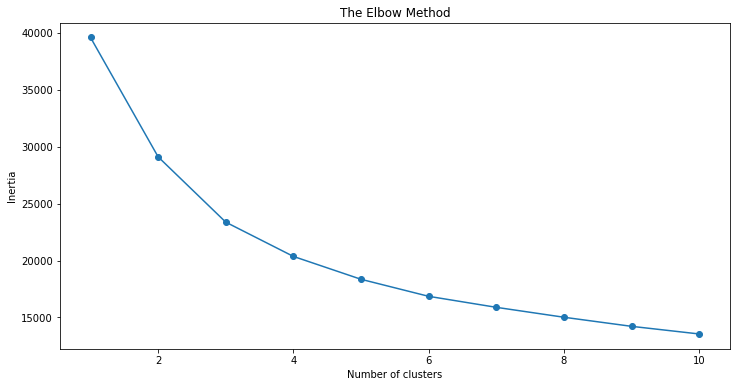

In [80]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(customers_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method');

In [81]:
# k means using 3 clusters and k-means++ initialization

kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(customers_scaled)
pred = kmeans.predict(customers_scaled)

In [82]:


frame = pd.DataFrame(customers_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    3043
0    2714
1    2163
Name: cluster, dtype: int64

In [83]:
frame

,0,1,2,3,4,cluster
0,1.620511,-0.955210,-0.839685,-0.469492,0.675992,1
1,2.054903,-0.682043,-0.264738,0.334875,2.998067,1
2,0.536236,1.168935,1.719070,-0.673129,0.703449,0
3,0.724469,-0.819719,-0.870240,2.075973,1.178062,1
4,0.438511,-0.203455,-0.343337,0.202511,-1.147935,2
...,...,...,...,...,...,...
7915,-0.145009,-0.269015,-0.601362,0.009056,0.377888,2
7916,-0.917681,2.119555,2.192242,-0.998948,-1.045952,0
7917,-0.926718,0.635713,1.175501,0.019238,-0.947891,0
7918,0.356809,-1.081959,-0.806555,0.619967,0.566164,1


In [84]:
frame_2 = pd.DataFrame(customers)
frame_2['cluster'] = pred
frame_2['cluster'].value_counts()

2    3043
0    2714
1    2163
Name: cluster, dtype: int64

In [85]:
frame_2

,total_spending,avg_discount_rate,discount_freq,visit_freq,total_products,cluster
cust_id,,,,,,
29568,10990.29,0.1160,0.255803,0.401370,1151,1
29909,11836.72,0.1285,0.302746,0.509589,1743,1
39774,8877.54,0.2132,0.464719,0.373973,1158,0
39856,9244.32,0.1222,0.253308,0.743836,1279,1
59984,8687.12,0.1504,0.296328,0.491781,686,2
...,...,...,...,...,...,...
99969716,7550.11,0.1474,0.275261,0.465753,1075,2
99969769,6044.53,0.2567,0.503352,0.330137,712,0
99989975,6026.92,0.1888,0.420338,0.467123,737,0


# Centroids Position

In [86]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

centroids

,0,1,2,3,4
0,-0.482372,0.925721,0.948206,-0.358937,0.018003
1,1.117030,-0.040199,-0.066695,0.507642,0.881562
2,-0.364343,-0.796178,-0.797374,-0.041098,-0.642748


In [87]:
StdScaler = StandardScaler()

centroids_scaled = StdScaler.fit_transform(centroids)

centroids_frame = pd.DataFrame(centroids_scaled)

centroids_frame.columns = customers.columns.values[0:5]

centroids_frame

,total_spending,avg_discount_rate,discount_freq,visit_freq,total_products
0,-0.786648,1.271374,1.285549,-1.102992,-0.108316
1,1.411110,-0.099305,-0.132361,1.318019,1.275305
2,-0.624463,-1.172069,-1.153188,-0.215027,-1.166989


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

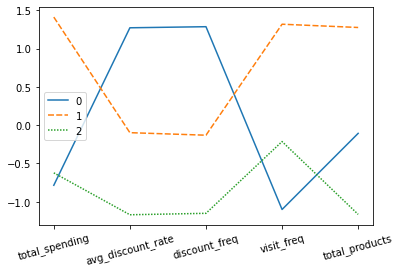

In [88]:
sns.lineplot(data = centroids_frame.T)
plt.xticks(rotation=15)

# Analyzing each Cluster

In [89]:
frame_2.groupby('cluster').describe().T

cluster                             0             1             2
total_spending    count   2714.000000   2163.000000   3043.000000
                  mean    6894.008143  10011.173361   7121.327207
                  std     1328.342540   1518.493164   1416.302874
                  min     3858.710000   5907.480000   4422.130000
                  25%     5858.160000   8882.900000   6069.690000
                  50%     6706.755000   9975.420000   6853.990000
                  75%     7712.147500  11169.380000   7911.590000
                  max    13904.080000  13680.710000  13782.890000
avg_discount_rate count   2714.000000   2163.000000   3043.000000
                  mean       0.202065      0.157823      0.123275
                  std        0.031786      0.032723      0.029302
                  min        0.132400      0.061200      0.034200
                  25%        0.179100      0.135600      0.102200
                  50%        0.197300      0.158100      0.125700
                  75%        0.218975      0.180550      0.145800
                  max        0.373800      0.273400      0.220300
discount_freq     count   2714.000000   2163.000000   3043.000000
                  mean       0.401756      0.318818      0.259274
                  std        0.061274      0.057211      0.045582
                  min        0.252742      0.154229      0.103704
                  25%        0.356492      0.279666      0.227313
                  50%        0.392811      0.317266      0.261082
                  75%        0.434703      0.355814      0.293638
                  max        0.794456      0.556786      0.432452
visit_freq        count   2714.000000   2163.000000   3043.000000
                  mean       0.416313      0.533038      0.458851
                  std        0.100745      0.141061      0.135975
                  min        0.047945      0.215068      0.089041
                  25%        0.352055      0.425342      0.371233
                  50%        0.405479      0.510959      0.435616
                  75%        0.468493      0.622603      0.530137
                  max        0.983562      0.991781      0.982192
total_products    count   2714.000000   2163.000000   3043.000000
                  mean     983.491525   1203.093389    814.819915
                  std      207.366755    214.790743    188.132734
                  min      112.000000    443.000000    130.000000
                  25%      850.000000   1060.500000    688.500000
                  50%      990.000000   1193.000000    823.000000
                  75%     1118.000000   1338.000000    950.000000
                  max     1732.000000   1966.000000   1357.000000

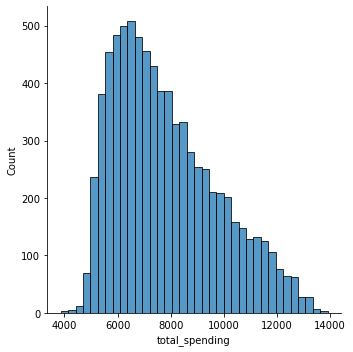

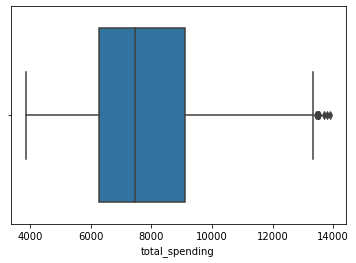

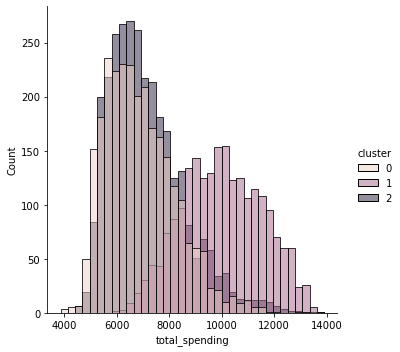

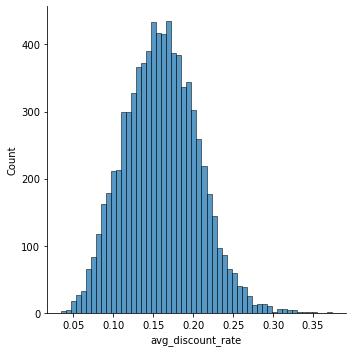

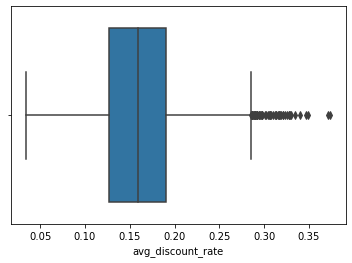

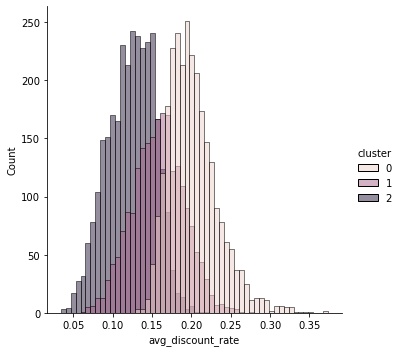

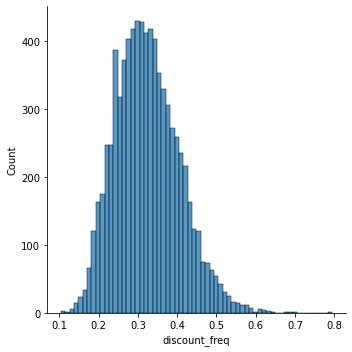

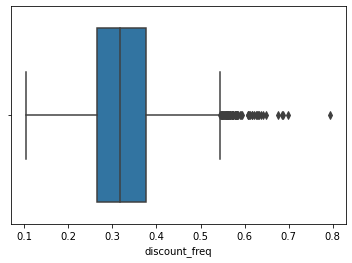

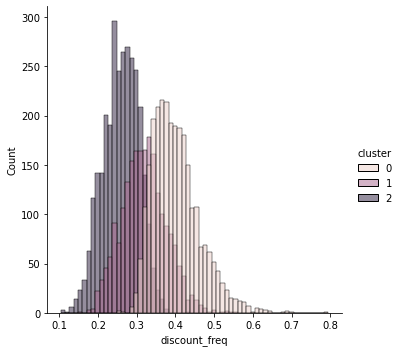

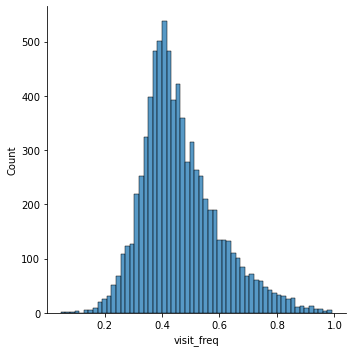

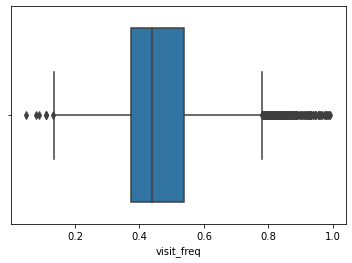

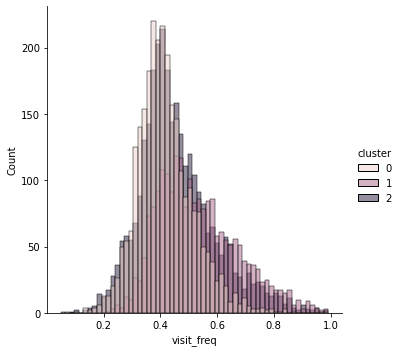

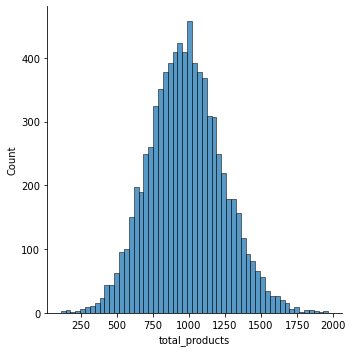

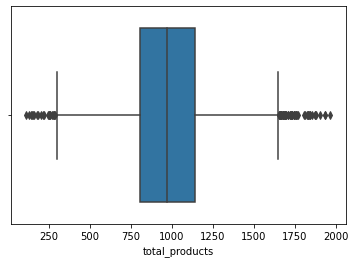

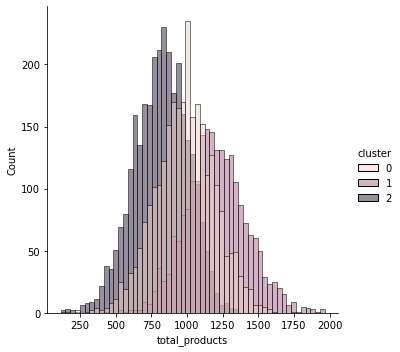

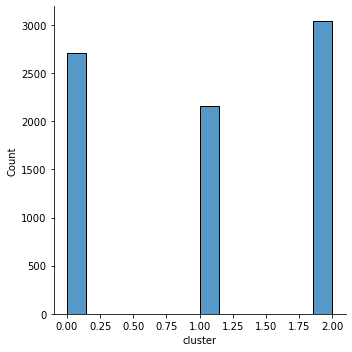

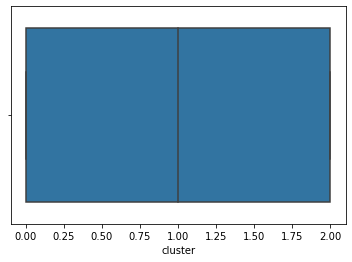

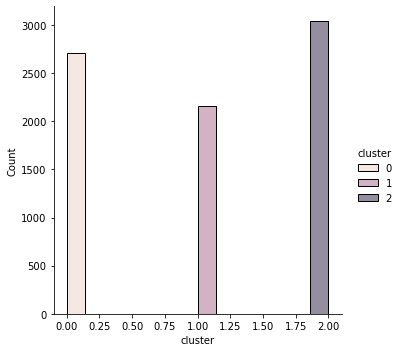

In [95]:
for i in customers.columns.values:
    g = sns.displot(data = customers, x = i)
    plt.show()
    g = sns.boxplot(data = customers, x = i)
    plt.show()
    g = sns.displot(data = customers, x = i, hue = "cluster")
    plt.show()

In [92]:
customers.describe()

,total_spending,avg_discount_rate,discount_freq,visit_freq,total_products,cluster
count,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,7832.664744,0.159710,0.324361,0.464535,978.659596,1.041540
std,1948.660139,0.045762,0.081653,0.134548,254.960478,0.851622
min,3858.710000,0.034200,0.103704,0.047945,112.000000,0.000000
25%,6276.290000,0.127400,0.264605,0.375342,804.000000,0.000000
50%,7445.910000,0.159000,0.318030,0.439726,972.000000,1.000000
75%,9117.292500,0.190700,0.376445,0.536986,1142.000000,2.000000
max,13904.080000,0.373800,0.794456,0.991781,1966.000000,2.000000
